### Big HW
Decision Tree
Random Forest
LogReg
KNN
Naive Bayes 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
import matplotlib.pyplot as plt

In [4]:
import fcalc

In [74]:
# df_h = pd.read_csv('Datasets/heart.csv')
# df_l = pd.read_csv('Datasets/Anonymize_Loan_Default_data.csv', encoding='unicode_escape')
df_hb = pd.read_csv(r'Datasets\hotel_booking.csv', encoding='unicode_escape')
# display(df_h)
# display(df_l)
display(df_hb)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [75]:
df_hb = df_hb.drop(columns=['reservation_status_date','name','email','phone-number','credit_card'] )
df_hb = df_hb.dropna()

In [76]:
df_b = pd.DataFrame()

In [77]:
df_hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [78]:
not_bin_cols = []
bad_cols = ['agent', 'company', 'days_in_waiting_list', ]
columns = {'hotel' : 0, 'is_canceled' : 0
           , 'lead_time' : 10, 'arrival_date_year' : 0
           , 'arrival_date_month' : 0, 'arrival_date_week_number' : 10
           , 'arrival_date_day_of_month' : 0, 'stays_in_weekend_nights' : 0
           , 'stays_in_week_nights' : 0, 'adults' : 0
           , 'children' : 0, 'babies' : 0
           , 'meal' : 0, 'country' : 0
           , 'market_segment' : 0, 'distribution_channel' : 0
           , 'is_repeated_guest' : 0, 'previous_cancellations' : 0
           , 'previous_bookings_not_canceled' : 0, 'reserved_room_type' : 0
           , 'assigned_room_type' : 0, 'booking_changes' : 0
           , 'deposit_type' : 0, 'customer_type' : 0
           , 'adr' : 5, 'required_car_parking_spaces' : 0
           , 'total_of_special_requests' : 0}

In [79]:
for col in df_hb.columns:
    print(f'===================== {col} ========================')
    print('Unique values:', len(np.unique(df_hb[col])))
    print(np.unique(df_hb[col])[:25])
    


===================== hotel ========================
Unique values: 2
['City Hotel' 'Resort Hotel']
===================== is_canceled ========================
Unique values: 2
[0 1]
===================== lead_time ========================
Unique values: 50
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 23 24 25
 27]
===================== arrival_date_year ========================
Unique values: 3
[2015 2016 2017]
===================== arrival_date_month ========================
Unique values: 12
['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
===================== arrival_date_week_number ========================
Unique values: 38
[ 1  2  3  4  5  6  8  9 10 11 12 15 19 20 21 22 23 24 25 28 29 32 33 35
 36]
===================== arrival_date_day_of_month ========================
Unique values: 29
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20 21 22 23 24 25 26
 27]
===================== stays_in_w

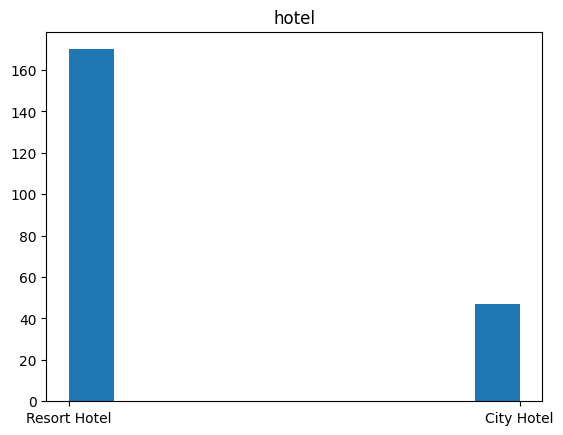

Fine for binarization.


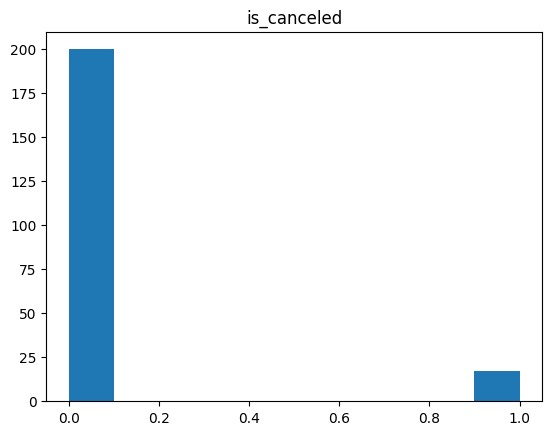

Fine for binarization.


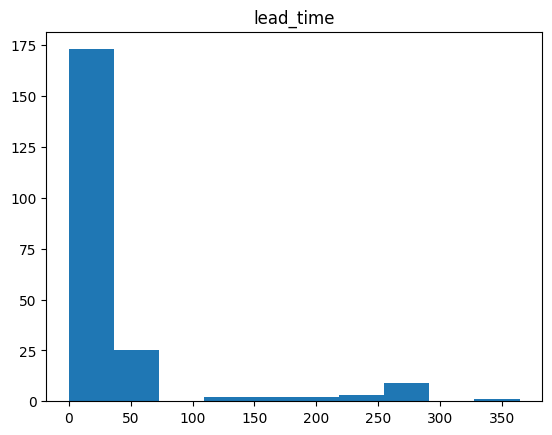

Categories chose: 10


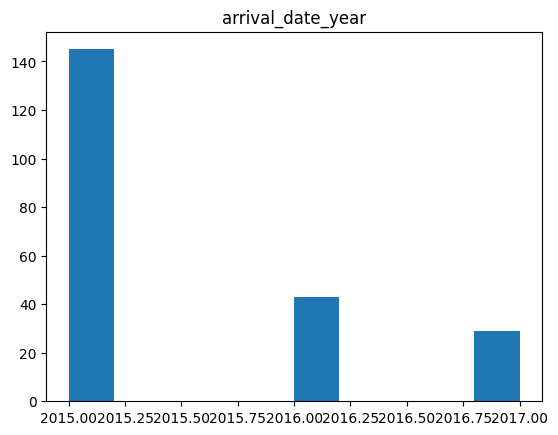

Fine for binarization.


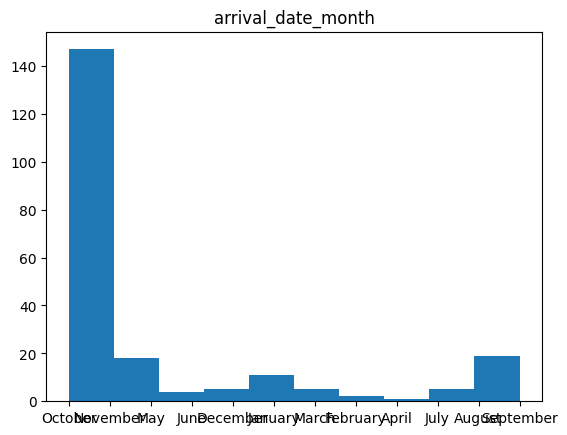

Fine for binarization.


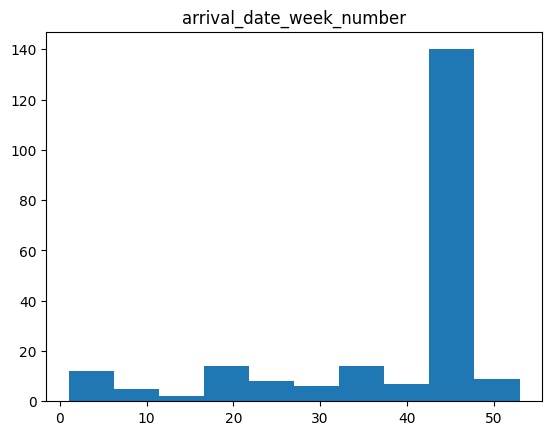

Bad column: arrival_date_week_number


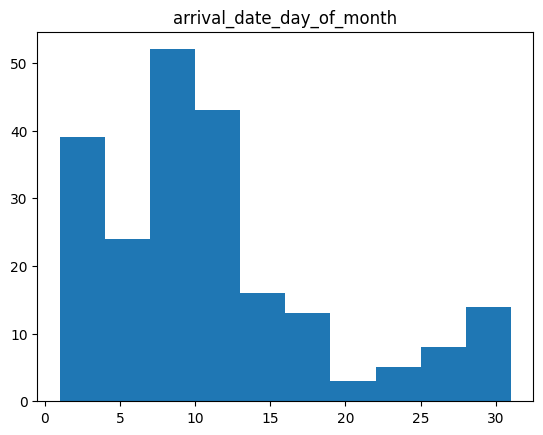

Fine for binarization.


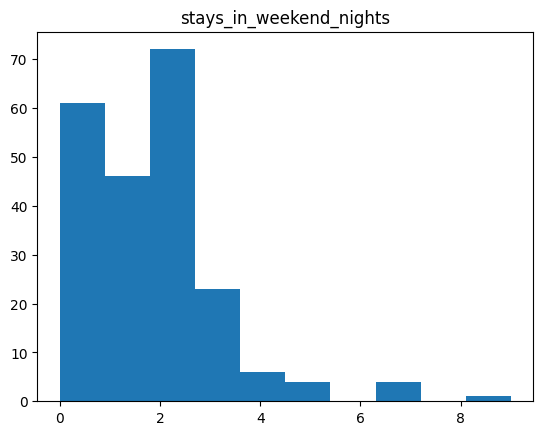

Fine for binarization.


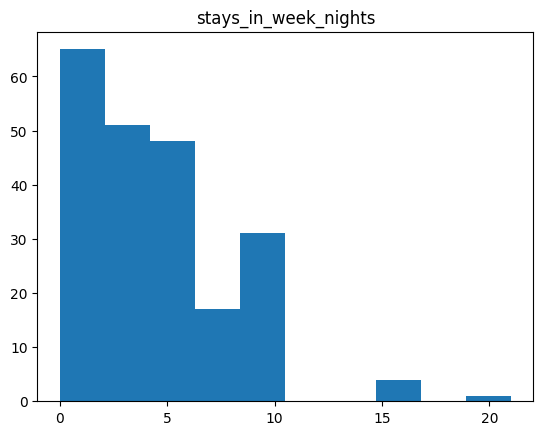

Fine for binarization.


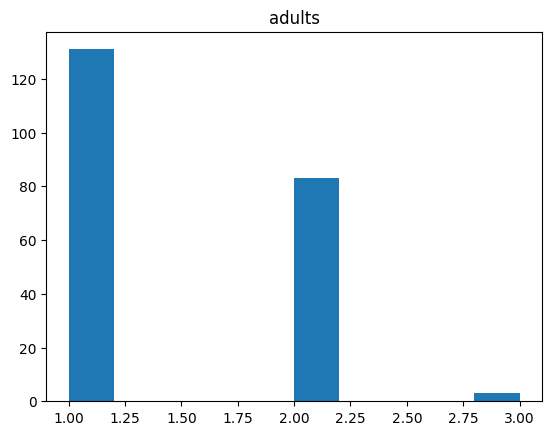

Fine for binarization.


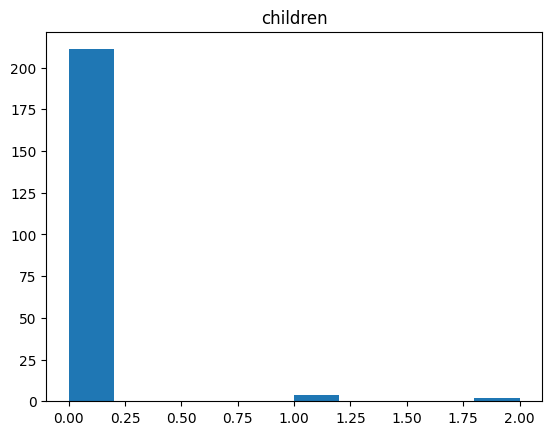

Fine for binarization.


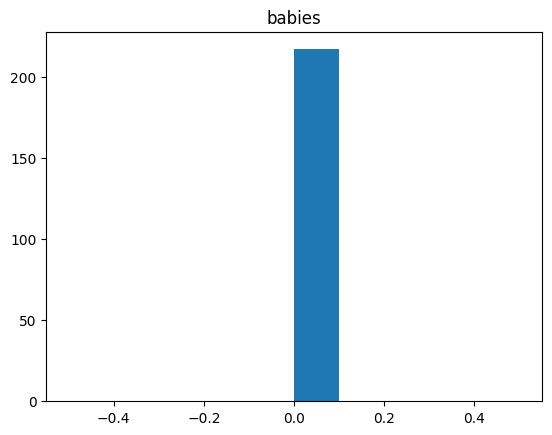

Fine for binarization.


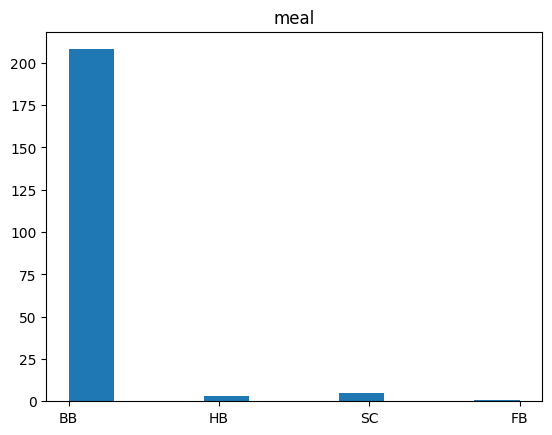

Fine for binarization.


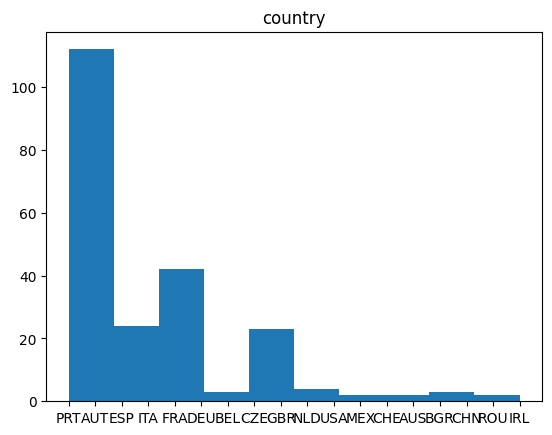

Fine for binarization.


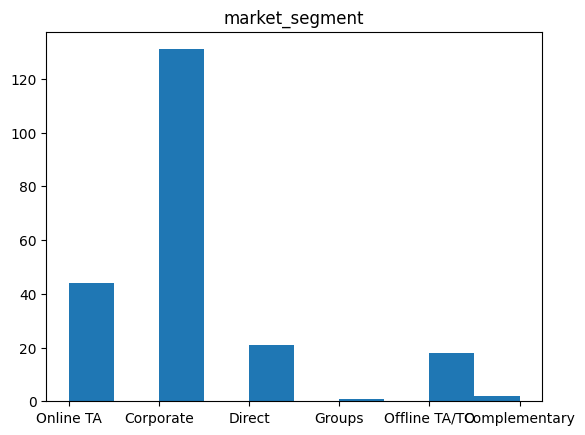

Fine for binarization.


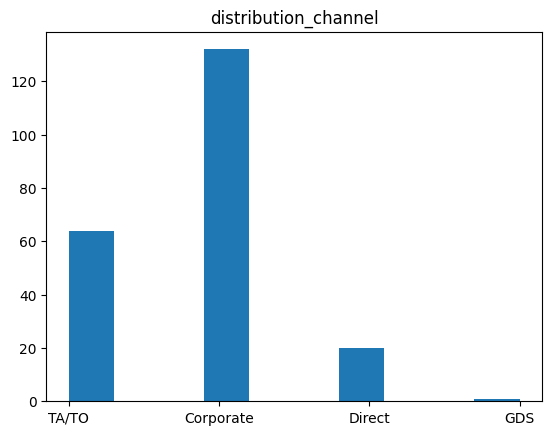

Fine for binarization.


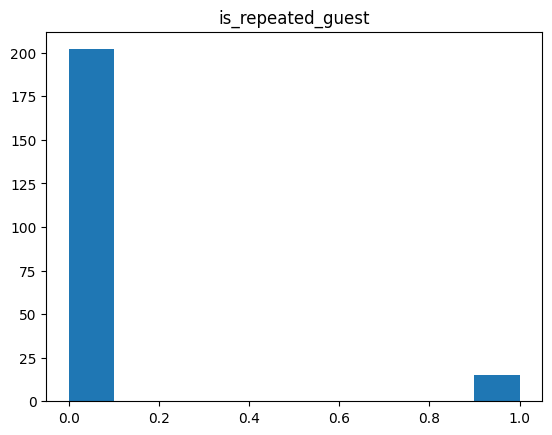

Fine for binarization.


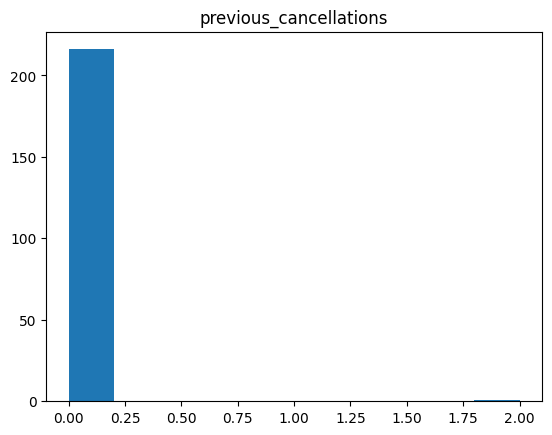

Fine for binarization.


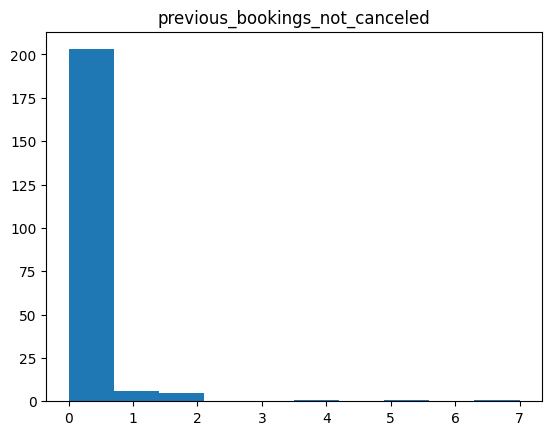

Fine for binarization.


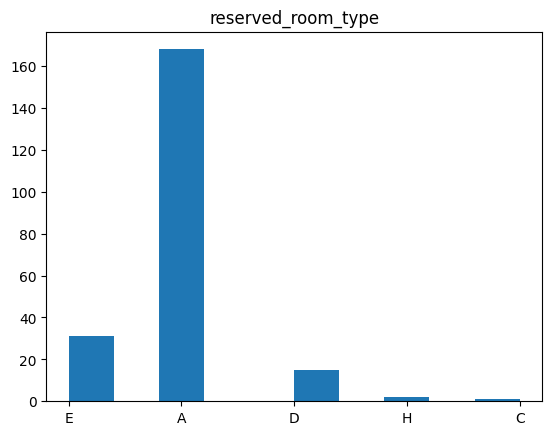

Fine for binarization.


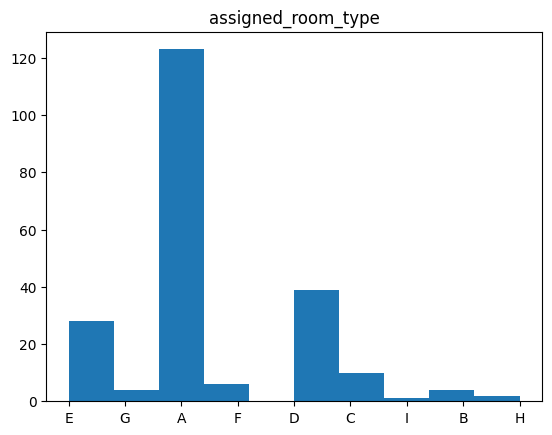

Fine for binarization.


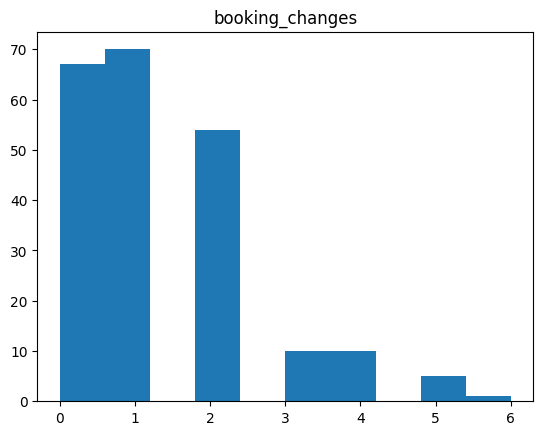

Fine for binarization.


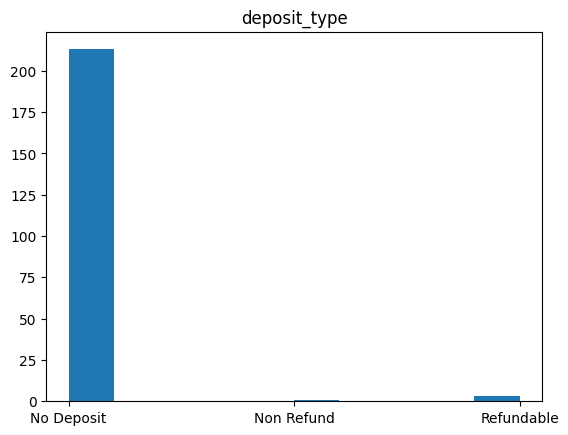

Fine for binarization.


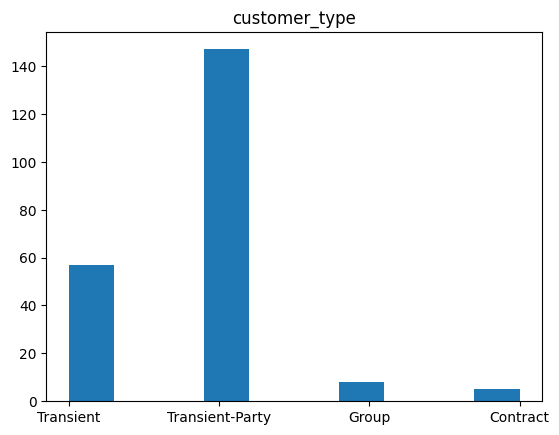

Fine for binarization.


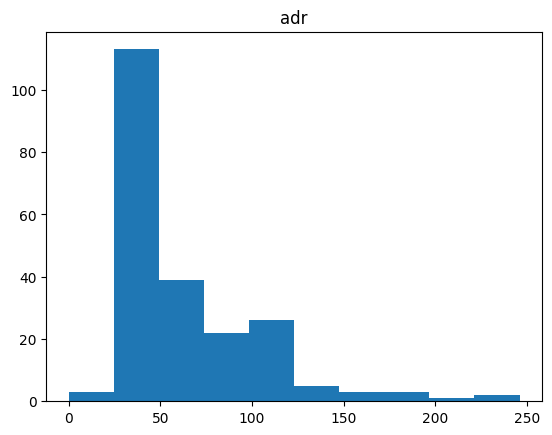

Categories chose: 5


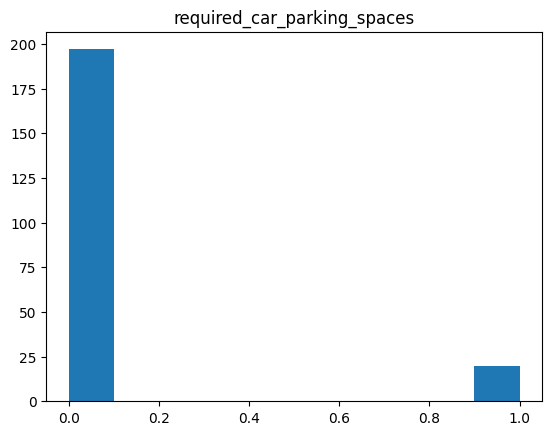

Fine for binarization.


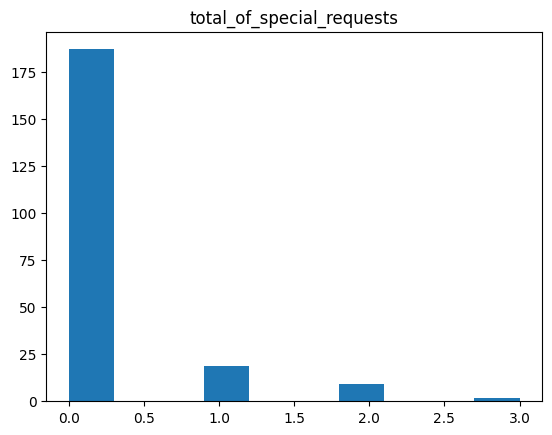

Fine for binarization.


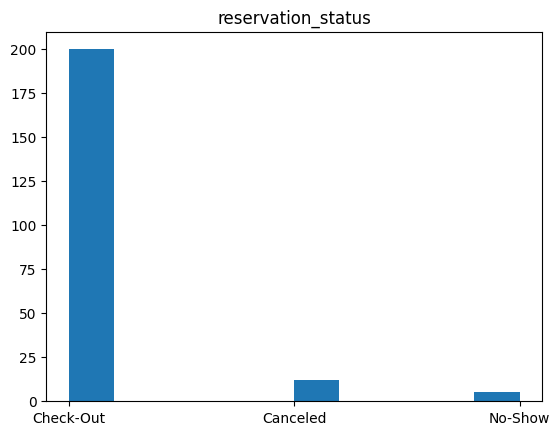

Bad column: reservation_status


In [80]:
df_hb = df_hb.drop(columns=bad_cols)
bad_cols = []
for col in df_hb.columns:
    try:    
        plt.hist(df_hb[col])
        plt.title(col)
        plt.show()
            
        if len(np.unique(df_hb[col])) > 2:
            not_bin_cols.append(col)
        k = columns[col]
        if k:
            df_b[col] = pd.qcut(df_hb[col], q=k, precision=3)
            print('Categories chose:', k)
        else:
            df_b[col] = df_hb[col]
            print('Fine for binarization.')
    except:
        print('Bad column:', col)
        bad_cols.append(col)

In [81]:
df_b.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [86]:
not_bin_cols.remove('arrival_date_week_number')
not_bin_cols.remove('reservation_status')


In [83]:
not_bin_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'customer_type',
 'adr',
 'total_of_special_requests',
 'reservation_status']

In [84]:
for col in ['hotel','is_canceled','babies','is_repeated_guest','previous_cancellations','required_car_parking_spaces']:
    if len(np.unique(df_b[col])) == 2:
        df_b[col] = (df_hb[col] == df_hb[col].values[0]).astype(int)
        display(df_b[col].value_counts())

hotel
1    170
0     47
Name: count, dtype: int64

is_canceled
1    200
0     17
Name: count, dtype: int64

is_repeated_guest
1    202
0     15
Name: count, dtype: int64

previous_cancellations
1    216
0      1
Name: count, dtype: int64

required_car_parking_spaces
0    197
1     20
Name: count, dtype: int64

In [87]:
df_bin = pd.get_dummies(df_b, columns=not_bin_cols).astype('bool')
df_bin.drop_duplicates(inplace=True)

In [88]:
df_bin

,hotel,is_canceled,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,"lead_time_(-0.001, 1.6]","lead_time_(1.6, 8.2]","lead_time_(8.2, 16.6]","lead_time_(16.6, 24.0]",...,customer_type_Transient-Party,"adr_(-0.001, 36.0]","adr_(36.0, 43.2]","adr_(43.2, 52.2]","adr_(52.2, 95.0]","adr_(95.0, 246.0]",total_of_special_requests_0,total_of_special_requests_1,total_of_special_requests_2,total_of_special_requests_3
2392,True,True,False,True,True,True,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
2697,True,True,False,True,True,False,False,False,False,True,...,True,False,False,True,False,False,True,False,False,False
2867,True,True,False,True,True,False,False,False,False,True,...,True,False,False,True,False,False,True,False,False,False
2877,True,True,False,True,True,False,False,False,False,True,...,True,False,True,False,False,False,True,False,False,False
2878,True,True,False,True,True,False,False,False,False,True,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,False,True,False,True,True,False,False,False,True,False,...,True,False,False,False,False,True,False,True,False,False
113046,False,True,False,True,True,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
113082,False,True,False,True,True,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
113627,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [89]:
df_bin.shape

(187, 162)

In [90]:
df_bin['is_canceled'].value_counts(normalize=True)

is_canceled
True     0.919786
False    0.080214
Name: proportion, dtype: float64

In [99]:
df_positive = df_bin[df_bin['is_canceled'] == True].sample(n=85, random_state=3407)
df_negative = df_bin[df_bin['is_canceled'] == False].sample(n=15, random_state=3407)
df = pd.concat([df_positive, df_negative], axis=0)
df = df.sample(frac=1, random_state=3407)
df

,hotel,is_canceled,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,"lead_time_(-0.001, 1.6]","lead_time_(1.6, 8.2]","lead_time_(8.2, 16.6]","lead_time_(16.6, 24.0]",...,customer_type_Transient-Party,"adr_(-0.001, 36.0]","adr_(36.0, 43.2]","adr_(43.2, 52.2]","adr_(52.2, 95.0]","adr_(95.0, 246.0]",total_of_special_requests_0,total_of_special_requests_1,total_of_special_requests_2,total_of_special_requests_3
31325,True,True,False,True,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
42126,False,True,False,True,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
30628,True,True,False,True,True,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
34086,True,True,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
18217,True,True,False,True,True,False,False,False,False,False,...,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,True,True,False,True,True,False,False,False,False,True,...,True,False,False,True,False,False,True,False,False,False
3032,True,True,False,True,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2918,True,True,False,True,True,True,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
38400,True,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [100]:
df.shape

(100, 162)

In [101]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
True     0.85
False    0.15
Name: proportion, dtype: float64

In [103]:
features = df.drop(columns='is_canceled').columns
target = ['is_canceled']

In [104]:
X = df[features]
y = df[target]

# Testing models

In [105]:
scoring = {'accuracy' : make_scorer(accuracy_score),
           'f1_macro' : make_scorer(f1_score, average='macro'),
           'f1_binary' : make_scorer(f1_score),
          }

kfold = StratifiedKFold(n_splits=10, random_state=3407, shuffle=True)

In [106]:
def print_results(results):
    acc = np.round(np.mean(results['test_accuracy']), 4) 
    f1_m = np.round(np.mean(results['test_f1_macro']), 4)
    f1_b = np.round(np.mean(results['test_f1_binary']), 4)
    print(f'Accuracy = {acc:0.4f}, F1_macro = {f1_m:0.4f}, F1_binary = {f1_b:0.4f}')  

In [107]:
import warnings
warnings.filterwarnings('ignore')

# Standard models

### Logistic regression

In [108]:
parameters = {'C' : np.linspace(1,5,101)}

model = LogisticRegression()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 101 candidates, totalling 1010 fits


{'C': 1.48}

In [109]:
model = LogisticRegression(C=best.best_params_['C'])
results = cross_validate(estimator=model,
                         X=X, y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.8700, F1_macro = 0.5967, F1_binary = 0.9267


### K-Nearest Neighbours

In [110]:
parameters = {'n_neighbors' : range(3, 20, 1)}

model = KNeighborsClassifier()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )

best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 17 candidates, totalling 170 fits


{'n_neighbors': 13}

In [111]:
model = KNeighborsClassifier(n_neighbors=best.best_params_['n_neighbors'])
results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.8800, F1_macro = 0.5836, F1_binary = 0.9338


### Naive Bayes

In [112]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

model = GaussianNB()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.01519911082952933}

In [113]:
model = GaussianNB(var_smoothing=best.best_params_['var_smoothing'])

results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.8500, F1_macro = 0.5988, F1_binary = 0.9142


### Decision tree

In [114]:
parameters = {'min_samples_split' : range(2,21,2),
              'max_depth' : range(2,13,2),
              'criterion' : ['gini', 'entropy']
             }

model = DecisionTreeClassifier()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 8}

In [115]:
model = DecisionTreeClassifier(
    max_depth=best.best_params_['max_depth'], 
    min_samples_split=best.best_params_['min_samples_split'],
    criterion=best.best_params_['criterion']
)
results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.8100, F1_macro = 0.5885, F1_binary = 0.8871


### RandomForest

In [116]:
parameters = {'n_estimators' : range(5,51,10),
              'min_samples_split' : range(2,13,2),
              'max_depth' : range(4,11,2),
              'criterion' : ['gini', 'entropy']
             }
model = RandomForestClassifier()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 25}

In [117]:
model = RandomForestClassifier(
    n_estimators=best.best_params_['n_estimators'],
    min_samples_split=best.best_params_['min_samples_split'],
    max_depth=best.best_params_['max_depth'],
    criterion=best.best_params_['criterion']
)
results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.8500, F1_macro = 0.5411, F1_binary = 0.9155


# Lazy FCA

Due to the multilabel output of **BinarizedBinaryClassifier** (**1** for **True**, **0** for **false** and **-1** for **undefined**) we cannot utilize **f1_score** with **average='binary'**. Therefore, a function that interprets **undefined** as misclassification was implemented.

In [118]:
def compare_with_binary_f1(y_true, y_pred):
    y_tmp = np.concatenate(
        (np.array(y_true)[:,None],np.array(y_pred)[:,None]),
        axis=1
    )
    df_tmp = pd.DataFrame(y_tmp, columns=['y_true','y_pred'])
    df_tmp.y_true = df_tmp.y_true.astype(bool)
    df_tmp['y_new']= ~df_tmp.loc[df_tmp.y_pred==-1]['y_true']
    df_tmp.loc[df_tmp.y_pred!=-1, 'y_new'] = df_tmp.loc[df_tmp.y_pred!=-1,'y_pred'].astype(bool) 
    df_tmp.y_new = df_tmp.y_new.astype(bool)
    return(f1_score(df_tmp.y_true, df_tmp.y_new))

In [119]:
def results_fca(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    f1_binary = compare_with_binary_f1(y_true, y_pred)
    return (accuracy, f1, f1_binary)  

## BinarizedBinaryClassifier

**BinarizedBinaryClassifier** is not a **scikit** model, so **GridSearchCV** and **cross_validate** from **scikit** do not support it. Thus, we check desired parameters in **for**  loops.

In [120]:
parameters = {'alpha' : np.linspace(0, 1, 5),
              'method': ['standard','standard-support','ratio-support'],
             }

n = kfold.get_n_splits(X)

f1_best = 0
alpha_best = 0.
method_best = 'standard'

for method in parameters['method']:
    for alpha in parameters['alpha']:
        
        f1 = [0 for i in range(n)]
        for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
            bin_cls = fcalc.classifier.BinarizedBinaryClassifier(
                X.iloc[train_index].values, 
                y.iloc[train_index][y.columns[0]].values,
                method=method,
                alpha=alpha
            )
            bin_cls.predict(X.iloc[test_index].values)
            f1[i] = f1_score(y.iloc[test_index], bin_cls.predictions, average='macro')
            print(f"[CV {i+1}/{n}] method={method}, alpha={alpha:0.2f}, f1_macro={f1[i]:0.4f}") 
                    
        f1_mean = np.mean(f1)
        print(f'f1_mean = {f1_mean:0.4f}\n')
        if(f1_mean > f1_best):
            f1_best = f1_mean
            alpha_best = alpha
            method_best = method
            
print(f"f1_best={f1_best:0.4f}, method={method_best}, alpha={alpha_best:0.2f}")

[CV 1/10] method=standard, alpha=0.00, f1_macro=0.6875
[CV 2/10] method=standard, alpha=0.00, f1_macro=0.5139
[CV 3/10] method=standard, alpha=0.00, f1_macro=0.4444
[CV 4/10] method=standard, alpha=0.00, f1_macro=0.3750
[CV 5/10] method=standard, alpha=0.00, f1_macro=0.4444
[CV 6/10] method=standard, alpha=0.00, f1_macro=1.0000
[CV 7/10] method=standard, alpha=0.00, f1_macro=0.8039
[CV 8/10] method=standard, alpha=0.00, f1_macro=0.4118
[CV 9/10] method=standard, alpha=0.00, f1_macro=0.6000
[CV 10/10] method=standard, alpha=0.00, f1_macro=0.6703
f1_mean = 0.5951

[CV 1/10] method=standard, alpha=0.25, f1_macro=0.5238
[CV 2/10] method=standard, alpha=0.25, f1_macro=0.2000
[CV 3/10] method=standard, alpha=0.25, f1_macro=0.1667
[CV 4/10] method=standard, alpha=0.25, f1_macro=0.0909
[CV 5/10] method=standard, alpha=0.25, f1_macro=0.2000
[CV 6/10] method=standard, alpha=0.25, f1_macro=0.4000
[CV 7/10] method=standard, alpha=0.25, f1_macro=0.5833
[CV 8/10] method=standard, alpha=0.25, f1_macr

In [121]:
f1 = [0 for i in range(n)]
accuracy = [0 for i in range(n)]
f1_binary = [0 for i in range(n)]

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    bin_cls = fcalc.classifier.BinarizedBinaryClassifier(
        X.iloc[train_index].values, 
        y.iloc[train_index][y.columns[0]].values,
        method=method_best,
        alpha=alpha_best
    )
    bin_cls.predict(X.iloc[test_index].values)
    
    accuracy[i], f1[i], f1_binary[i] = results_fca(y.iloc[test_index][y.columns[0]].values, bin_cls.predictions)
    
    print(f"[CV {i+1}/{n}] method={method_best}, alpha={alpha_best:0.2f}", 
          f"accuracy={accuracy[i]:0.4f}, f1_macro={f1[i]:0.4f}, f1_binary={f1_binary[i]:0.4f}")

f1_mean = np.mean(f1)
accuracy_mean = np.mean(accuracy)
f1_binary_mean = np.mean(f1_binary)

print(f"\n accuracy={accuracy_mean:0.4f}, f1_macro={f1_mean:0.4f}, f1_binary={f1_binary_mean:0.4f}")

[CV 1/10] method=standard, alpha=0.00 accuracy=0.8000, f1_macro=0.6875, f1_binary=0.8750
[CV 2/10] method=standard, alpha=0.00 accuracy=0.8000, f1_macro=0.5139, f1_binary=0.8750
[CV 3/10] method=standard, alpha=0.00 accuracy=0.8000, f1_macro=0.4444, f1_binary=0.8889
[CV 4/10] method=standard, alpha=0.00 accuracy=0.6000, f1_macro=0.3750, f1_binary=0.7500
[CV 5/10] method=standard, alpha=0.00 accuracy=0.8000, f1_macro=0.4444, f1_binary=0.8889
[CV 6/10] method=standard, alpha=0.00 accuracy=1.0000, f1_macro=1.0000, f1_binary=1.0000
[CV 7/10] method=standard, alpha=0.00 accuracy=0.9000, f1_macro=0.8039, f1_binary=0.9412
[CV 8/10] method=standard, alpha=0.00 accuracy=0.7000, f1_macro=0.4118, f1_binary=0.8235
[CV 9/10] method=standard, alpha=0.00 accuracy=0.7000, f1_macro=0.6000, f1_binary=0.8000
[CV 10/10] method=standard, alpha=0.00 accuracy=0.7000, f1_macro=0.6703, f1_binary=0.7692

 accuracy=0.7800, f1_macro=0.5951, f1_binary=0.8612


## PatternBinaryClassifier

In [122]:
parameters = {'alpha' : np.linspace(0, 0.4, 5),
              'method': ['standard','standard-support','ratio-support'],
             }

n = kfold.get_n_splits(X)

f1_best_p = 0
alpha_best_p = 0.
method_best_p = 'standard'

for method in parameters['method']:
    for alpha in parameters['alpha']:
        
        f1 = [0 for i in range(n)]
        for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
            bin_cls = fcalc.classifier.PatternBinaryClassifier(
                X.iloc[train_index].values, 
                y.iloc[train_index][y.columns[0]].values,
                method=method,
                alpha=alpha
            )
            bin_cls.predict(X.iloc[test_index].values)
            f1[i] = f1_score(y.iloc[test_index][y.columns[0]].values, bin_cls.predictions, average='macro')
            print(f"[CV {i+1}/{n}] method={method}, alpha={alpha:0.2f}, f1_macro={f1[i]:0.4f}") 
                    
        f1_mean = np.mean(f1)
        print(f'f1_mean = {f1_mean:0.4f}\n')
        if(f1_mean > f1_best_p):
            f1_best_p = f1_mean
            alpha_best_p = alpha
            method_best_p = method
            
print(f"f1_best={f1_best_p:0.4f}, method={method_best_p}, alpha={alpha_best_p:0.2f}")

[CV 1/10] method=standard, alpha=0.00, f1_macro=0.4118
[CV 2/10] method=standard, alpha=0.00, f1_macro=0.8039
[CV 3/10] method=standard, alpha=0.00, f1_macro=0.4737
[CV 4/10] method=standard, alpha=0.00, f1_macro=0.6000
[CV 5/10] method=standard, alpha=0.00, f1_macro=1.0000
[CV 6/10] method=standard, alpha=0.00, f1_macro=0.6875
[CV 7/10] method=standard, alpha=0.00, f1_macro=0.6000
[CV 8/10] method=standard, alpha=0.00, f1_macro=0.3162
[CV 9/10] method=standard, alpha=0.00, f1_macro=0.3750
[CV 10/10] method=standard, alpha=0.00, f1_macro=0.8667
f1_mean = 0.6135

[CV 1/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 2/10] method=standard, alpha=0.10, f1_macro=0.1667
[CV 3/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 4/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 5/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 6/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 7/10] method=standard, alpha=0.10, f1_macro=0.2222
[CV 8/10] method=standard, alpha=0.10, f1_macr

In [123]:
f1 = [0 for i in range(n)]
accuracy = [0 for i in range(n)]
f1_binary = [0 for i in range(n)]

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    bin_cls = fcalc.classifier.PatternBinaryClassifier(
        X.iloc[train_index].values, 
        y.iloc[train_index][y.columns[0]].values,
        method=method_best_p,
        alpha=alpha_best_p
    )
    bin_cls.predict(X.iloc[test_index].values)
    
    accuracy[i], f1[i], f1_binary[i] = results_fca(y.iloc[test_index][y.columns[0]].values, bin_cls.predictions)
    
    print(f"[CV {i+1}/{n}] method={method_best_p}, alpha={alpha_best_p:0.2f}", 
          f"accuracy={accuracy[i]:0.4f}, f1_macro={f1[i]:0.4f}, f1_binary={f1_binary[i]:0.4f}")

f1_mean = np.mean(f1)
accuracy_mean = np.mean(accuracy)
f1_binary_mean = np.mean(f1_binary)

print(f"\n accuracy={accuracy_mean:0.4f}, f1_macro={f1_mean:0.4f}, f1_binary={f1_binary_mean:0.4f}")

[CV 1/10] method=standard, alpha=0.00 accuracy=0.7000, f1_macro=0.4118, f1_binary=0.8235
[CV 2/10] method=standard, alpha=0.00 accuracy=0.9000, f1_macro=0.8039, f1_binary=0.9412
[CV 3/10] method=standard, alpha=0.00 accuracy=0.9000, f1_macro=0.4737, f1_binary=0.9474
[CV 4/10] method=standard, alpha=0.00 accuracy=0.7000, f1_macro=0.6000, f1_binary=0.8000
[CV 5/10] method=standard, alpha=0.00 accuracy=1.0000, f1_macro=1.0000, f1_binary=1.0000
[CV 6/10] method=standard, alpha=0.00 accuracy=0.8000, f1_macro=0.6875, f1_binary=0.8750
[CV 7/10] method=standard, alpha=0.00 accuracy=0.7000, f1_macro=0.6000, f1_binary=0.8000
[CV 8/10] method=standard, alpha=0.00 accuracy=0.5000, f1_macro=0.3162, f1_binary=0.6154
[CV 9/10] method=standard, alpha=0.00 accuracy=0.4000, f1_macro=0.3750, f1_binary=0.5000
[CV 10/10] method=standard, alpha=0.00 accuracy=0.9000, f1_macro=0.8667, f1_binary=0.9333

 accuracy=0.7500, f1_macro=0.6135, f1_binary=0.8236
